In [1]:
from loaders.emailTextLoader import get_emails
from loaders.ytbChannelLoader import get_videos

In [8]:
# email_corpus = get_emails()
# video_corpus = get_videos()

with open('test/day_mail_corpus.txt', 'r') as f:
    email_corpus = f.read()

with open('test/day_video_corpus.txt', 'r') as f:
    video_corpus = f.read()

In [9]:
len(video_corpus)

52994

In [10]:
len(email_corpus)

19066

In [6]:
# with open('test/day_mail_corpus.txt', 'w') as f:
#     f.write(email_corpus)

# with open('test/day_video_corpus.txt', 'w') as f:
#     f.write(video_corpus)

In [11]:
import re

def remove_emojis(text):

    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # Emoticons
                            u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                            u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                            u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                            u"\U0001F780-\U0001F7FF"  # Geometric Shapes
                            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                            u"\U0001F004-\U0001F0CF"  # CJK Compatibility Ideographs
                            u"\U0001F170-\U0001F251"  # Enclosed Ideographic Supplement
                            "]+", flags=re.UNICODE)

    # Remove emojis from the text
    text_without_emojis = re.sub(emoji_pattern, '', text)

    return text_without_emojis


In [12]:
len(remove_emojis(email_corpus))

19057

/home/dan/Documents/gen_ai/getNews/menv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


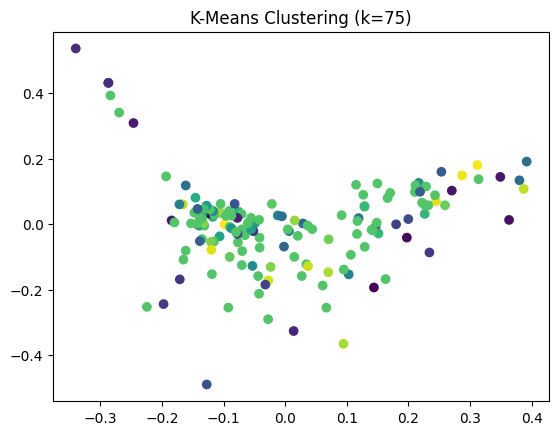

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Example preprocessed text data
corpus = email_corpus.split('.')

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Apply K-Means clustering
k = 75  # Number of clusters (you can experiment with different values)
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Scatter plot of clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-Means Clustering (k={k})')
plt.show()

# Create a dictionary to store representatives for each cluster
cluster_representatives = {}

# Iterate through data points and assign them to clusters
for i, label in enumerate(clusters):
    if label not in cluster_representatives:
        cluster_representatives[label] = []
    cluster_representatives[label].append(i)

# Choose representatives (original text) for each cluster
cluster_texts = {}
for label, data_point_indices in cluster_representatives.items():
    cluster_text = [corpus[i] for i in data_point_indices]
    cluster_texts[label] = cluster_text


In [16]:
for label, text in cluster_texts.items():
    print(f'Cluster {label}:')
    print(text)

Cluster 54:
["Welcome 🎉 Let's confirm your membership!\xa0Thank you for joining Alpha Signal, here's your first summary of the latest breakthroughs in AI", 'AlphaSignal\nHi Dan,Thank you for signing up to AlphaSignal', ' This will inform your mailbox that your summaries are not spam', 'STEP 1 - ALLOW SUMMARIESStep 2\nClick on the button below to activate your accountSTEP 2 - ACTIVATE ACCOUNTStep 3 (Gmail)\nStar and drag this email from the "Promotions" to "Primary" tabStep 3 (Outlook)\nDrag this email from the "Other" to "Focused" tabExcited to have you amongst us,\nAS TeamChanged your mind?\xa0use this', ' 🎹 Is This The Open-Source GitHub Copilot? Your weekly technical digest of top projects, repos, tips and tricks to stay ahead of the curve', '5k)What’s New?Tabby is an open-source, self-hosted AI coding assistant, positioning itself as a practical alternative to GitHub Copilot', 'Core FeaturesCompatibility: Integrates seamlessly with major Coding LLMs like CodeLlama, StarCoder, and C

In [19]:
import nltk
from nltk.stem import PorterStemmer

def stemming(corpus):
    # Download the NLTK data (if not already downloaded)
    nltk.download('punkt')

    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()

    # Tokenize the text into words
    words = nltk.word_tokenize(corpus)

    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the stemmed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)

    print(len(stemmed_text))

    return stemmed_text


In [18]:
import spacy

def lemma(corpus):
    nlp = spacy.load("en_core_web_sm")

    doc = nlp(corpus)

    lemmatized_text = ' '.join([token.lemma_ for token in doc])

    print(len(lemmatized_text))

    return lemmatized_text

In [17]:
import nltk
from nltk.corpus import stopwords
import string

def remove_stop(corpus):
    nltk.download('stopwords')

    words = nltk.word_tokenize(corpus)

    table = str.maketrans('', '', string.punctuation)
    stripped_words = [word.translate(table) for word in words]

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in stripped_words if word.lower() not in stop_words]

    filtered_text = ' '.join(filtered_words)

    print(len(filtered_text))

    return filtered_text

In [20]:
stemming(email_corpus)
lemma(email_corpus)
remove_stop(email_corpus)

[nltk_data] Downloading package punkt to /home/dan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


17061
18874
15608


[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Welcome 🎉 Let confirm membership  Thank joining Alpha Signal  first summary latest breakthroughs AIAlphaSignal Hi Dan  Thank signing AlphaSignal  receive read technical newsletter AI  help 100000 researchers engineers stay date latest breakthroughs covering impactful research  technical breakthroughs  news happening industry  Follow steps ensure receive summaries  Step 1 Click button send us automatic email  inform mailbox summaries spamSTEP 1  ALLOW SUMMARIESStep 2 Click button activate accountSTEP 2  ACTIVATE ACCOUNTStep 3  Gmail  Star drag email  Promotions   Primary  tabStep 3  Outlook  Drag email    Focused  tabExcited amongst us  TeamChanged mind  use  🎹 OpenSource GitHub Copilot  weekly technical digest top projects  repos  tips tricks stay ahead curve  September 27  2023  Read Online AlphaSignalHey Dan  Welcome week edition AlphaSignal newsletter AI professionals  Whether researcher  engineer  developer  data scientist  summaries ensure always uptodate latest breakthroughs AI 

In [21]:
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenize the text into sentences
sentences = sent_tokenize(email_corpus)

# Calculate TF-IDF scores for words in sentences
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Calculate sentence importance scores based on TF-IDF
sentence_scores = tfidf_matrix.sum(axis=1)

# Select the top N sentences
num_sentences = 10  # Adjust this based on your desired summary length
selected_sentences = []
for i in range(num_sentences):
    max_score_index = sentence_scores.argmax()
    selected_sentences.append(sentences[max_score_index])
    sentence_scores[max_score_index] = 0  # Mark the selected sentence as visited

# Reconstruct the summary
summary = ' '.join(selected_sentences)
print(len(summary))

5498


In [35]:
!pip install bardapi python-dotenv transformers sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.6 MB/s eta 0:00:0000:0100:01
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached safetensors-0.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached filelock-3.12.4-py3-none-any.whl (11 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 KB 43.1 MB/s eta 0:00:00
  Using cached torchvision-0.15.2-cp310-cp310-manylinux1_x86_64.whl (6.0 MB)
  Using cached sentencepiece-0.1.99-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
  Using cached fsspec-2023.9.2-py3-none-any.whl (173 kB)
  Using cached triton-2.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nv

In [48]:
from typing import Any, List, Mapping, Optional
from langchain.callbacks.manager import CallbackManagerForLLMRun
from langchain.llms.base import LLM
from bardapi import BardCookies
from dotenv import load_dotenv

class BardRAPI(LLM):
    @property
    def _llm_type(self) -> str:
        return "custom"

    def _call(
        self,
        prompt: str,
        stop: Optional[List[str]] = None,
        run_manager: Optional[CallbackManagerForLLMRun] = None,
    ) -> str:
        load_dotenv()
        print(prompt)
        bard = BardCookies(token_from_browser=True)
        return bard.get_answer(prompt)['content']

In [49]:
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain.docstore.document import Document
def summarize_text(corpora):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=2000
    )
    texts = text_splitter.split_text(corpora)
    docs = [Document(page_content=t) for t in texts]

    prompt_template = """You are given a text about various news happening in the space of artifical intelligence, machine learning or data science.
    Your job is to summarize the most important news from the text, with emphasis on news around large language models, and the tools that are used to handle them.
    Don't worry about the length of the summary, just make sure it is coherent and covers the most important points, and also does not skimp on details.


    {text}

    CONCISE SUMMARY: """

    gptlm = BardRAPI()
    PROMPT = PromptTemplate(template=prompt_template, input_variables=["text"])
    chain = load_summarize_chain(gptlm, chain_type="map_reduce", map_prompt=PROMPT, verbose=True)
    
    print(chain.llm_chain.prompt.template)
    print(chain.combine_document_chain.llm_chain.prompt.template)

    output_summary = chain.run(docs)
    return output_summary

In [50]:
response = summarize_text(remove_stop(email_corpus))

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


15608
You are given a text about various news happening in the space of artifical intelligence, machine learning or data science.
    Your job is to summarize the most important news from the text, with emphasis on news around large language models, and the tools that are used to handle them.
    Don't worry about the length of the summary, just make sure it is coherent and covers the most important points, and also does not skimp on details.


    {text}

    CONCISE SUMMARY: 
Write a concise summary of the following:


"{text}"


CONCISE SUMMARY:


> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
You are given a text about various news happening in the space of artifical intelligence, machine learning or data science.
    Your job is to summarize the most important news from the text, with emphasis on news around large language models, and the tools that are used to handle them.
    Don't worry about the length of the summary

In [59]:
print(response)

None


In [57]:
from bardapi import BardCookies
from datetime import datetime

bard = BardCookies(token_from_browser=True)
audio = bard.speech(response)

_ga
_ga_WH2QY8WWF5
_ga
_ga_S3V05QCXK5
OSID
__Secure-OSID
1P_JAR
AEC
APISID
CONSENT
HSID
NID
SAPISID
SEARCH_SAMESITE
SID
SIDCC
SOCS
SSID
__Secure-1PAPISID
__Secure-1PSID
__Secure-1PSIDCC
ACA-OxPsOZPnh2BTkVPqSQflEgWWiPoEJKVdqNX__BuL19HH-ydHFABXr1rc_-FWPalnBH867d8
__Secure-1PSIDTS
sidts-CjEB3e41hdYBJNp3cYCxad2MNQjlDZqEZW0Pcm_gwEzljmT7pfoygWsepdy_T8gwRPH0EAA


Exception: Response status code is not 200. Response Status is 429

In [58]:

today_str = datetime.today().strftime("%Y-%m-%d")

with open(f"summaries/audio/summary_{today_str}.ogg", "wb") as f:
  f.write(bytes(audio['audio']))

with open(f"summaries/text/summary_{today_str}.txt", "w") as f:
  f.write(response)

print(response)

from IPython.display import Audio
Audio(f'summaries/text/summary_{today_str}.ogg')


TypeError: write() argument must be str, not None

In [ ]:
import subprocess

subprocess.run("git add summaries/text", shell=True)
subprocess.run("git add summaries/audio", shell=True)

subprocess.run(f"git commit -m 'Summary for {today_str}'", shell=True)
subprocess.run("git push origin master", shell=True)